Question 1. 

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(0)

# Simulation parameters
n = 100  # sample size
beta0 = 5  # true intercept
beta1 = 2  # true slope
sigma = 1  # standard deviation of the error term

# Generate predictor variable x
x = np.random.uniform(0, 10, n)

# Generate random error term epsilon from a normal distribution
epsilon = np.random.normal(0, sigma, n)

# Compute outcome variable Y using the theoretical model with the error term
Y = beta0 + beta1 * x + epsilon

# Combine into a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Plot the data points
fig = px.scatter(df, x='x', y='Y', title='Simulated Data with Theoretical Line')

# Add the true theoretical line (without fitting)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f'Theoretical line', 
                line=dict(dash='dot', color='orange'))

fig.show()


Question 2.

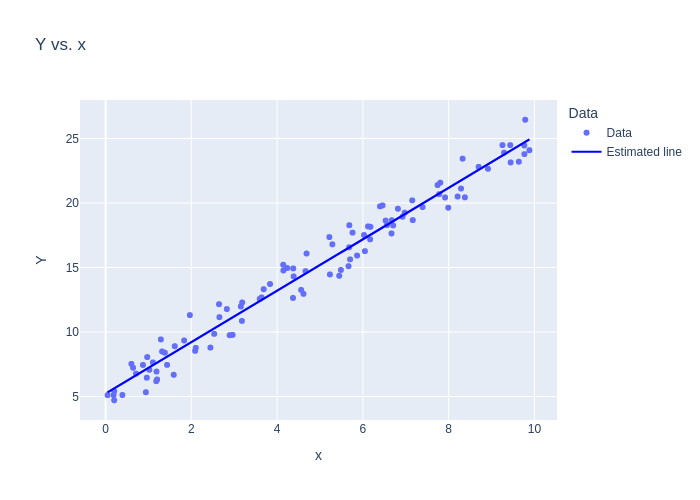

In [51]:
import statsmodels.formula.api as smf  # This is a statistical modeling library in Python to specify and 
# fit our Ordinary Least Squares (OLS) regression model.
import plotly.express as px  # This is a plotting library in Python to plot scatter plots 
# and add trendlines for visualizing regression fits.

df = pd.DataFrame({'x': x, 'Y': Y}) # Creating the dataframe

# Specify the model using Ordinary Least Squares (OLS) regression
model_data_specification = smf.ols("Y~x", data=df) 
# Fit the dataframe to the model
fitted_model = model_data_specification.fit() 

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Estimated line")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [52]:
print(fitted_model.summary())  #  Provides results like coefficient estimates, p-values, R-squared

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3262.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           4.88e-77
Time:                        03:59:25   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2222      0.193     27.017      0.0

In [53]:
print(fitted_model.summary().tables[1])  # Give the coefficient table of the intercept and slope

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2222      0.193     27.017      0.000       4.839       5.606
x              1.9937      0.035     57.117      0.000       1.924       2.063


In [54]:
print(fitted_model.params)  # The estimated parameters and values

Intercept    5.222151
x            1.993694
dtype: float64


In [55]:
print(fitted_model.params.values)  # The values of the estimated parameters

[5.22215108 1.9936935 ]


In [56]:
print(fitted_model.rsquared)  # R-squared value of the model or how well the model shows the variance in the outcome variable

0.9708365512617749


### Question 3.

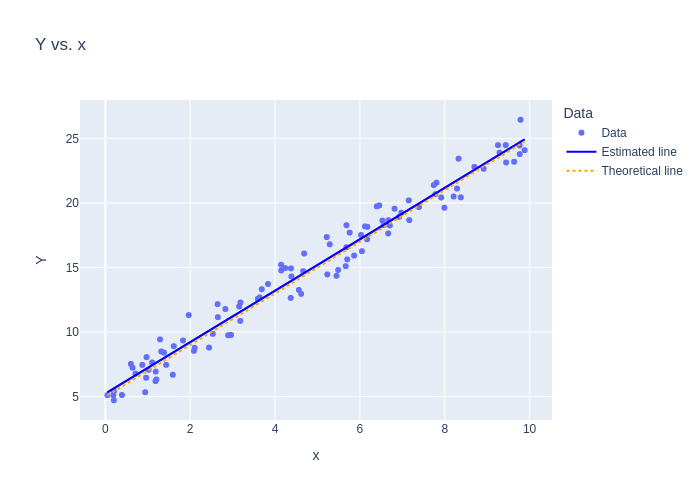

In [57]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name= 'Theoretical line', 
                line=dict(dash='dot', color='orange'))

# Display the figure with both lines
fig.show(renderer = 'png')


Theoretical Line (Orange dot line): This line represents the perfect linear relationship between the values of x and y. It follows a predefined slope of $\beta_1$ and an intercept of $\beta_0$. Here we are assuming that there will be no error or variance in our sampled data, which makes this line theoretical. 

Estimated / Fitted Line (Blue line): This line is the result of fitting an Ordinary Least Squares regression to the sampled data points, which we generated from a simulation of normal distrbution. In this sample data, each $Y_i$ value includes a random error term, which introduces random variability around the true line. With OLS minimizing the residual, the difference between the estimated y and theoretical y, the fitted line is slightly varied from the true line. The fitted line can thus be thought of as our best estimate of the theoretical relationship based on a given observed sample.

### Question 4. 

In fitted linear regression model, the fitted values are determined by the equation $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$. In fitted_model.summary().tables[1], there exists two parameters intercept and slope, and their coefficients represent $\hat{\beta}_0$ and $\hat{\beta}_1$ respectively. 

The intercept is an estimation of the value of the outcome variable when the predictor variable is zero, and the slope is the average change in the outcome variable's value when the predictor variable changes by 1. Using these two parameters, we estimate the fitted values $\hat{y}_i$ using the parameters and the x-values in the sampled data.

Question 5.

The Ordinary Least Squares (OLS) method chooses the line for the fitted model by finding the values of the intercept 
$\hat{\beta}_0$ and the slope $\hat{\beta}_1$ that minimize the sum of the squared residuals.

The residuals are defined as $e_i =Y_𝑖 − \hat{y}_𝑖$, represent the differences between observed values and fitted values. The OLS is squaring these residuals and summing them, which ensures that both positive and negative differences contribute equally, and it heavily penalizes larger deviations.

The result is a line that minimizes the total distance (in a squared sense) from all data points to the line, making it the best fit for the observed data.

Question 6.

First expression (1-((Y-fitted_model.fittedvalues)^2).sum()/((Y-Y.mean())^2).sum()) shows how much of the variation in Y is explained by the model, and this is the essence of what R^2 represents.

fitted_model.rsquared: The proportion of variation in Y explained by the regression model.

np.corrcoef(Y,fitted_model.fittedvalues)[0,1]^2: The squared correlation coefficient between Y and Y hat, which is equivalent to 
R^ 2 in simple linear regression.

np.corrcoef(Y,x)[0,1]^2: The squared correlation coefficient between Y and x, measuring the strength of the linear relationship between the independent and dependent variables before the model is fitted.

Question 7.

Linearity: The relationship between the predictor (amount of fertilizer) and the outcome (crop yield) might not be strictly linear, which questions the validity of using a simple linear regression model.

Homoscedasticity: If the residuals show increasing variance with increasing fertilizer amounts, this would violate the assumption of constant variance, indicating that a linear model might not be the best choice.

Question 8.

In [58]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:59:25   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis as parameters is that $\beta_1$ = 0. When the slope is zero, there is no linear association. Using the code above and the table, we observe that the p-value of the waiting is estimated to be 0.00. This means there is very strong evidence against the null hypothesis that the slope is not equal to 0, and that waiting time has a significant effect on the duration of eruption in the Old Faithful Geyser dataset.

### Question 9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


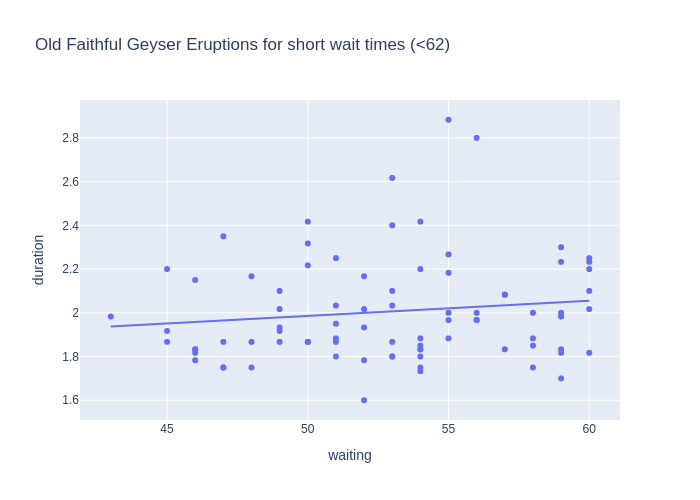

In [59]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

While restricting the waiting time to be < 62, the p-value of the parameter waiting is 0.238. Since this is a way larger p-value than our usually considered $\alpha$-significance level of 0.05, we have no evidence against the null hypothesis. Thus we conclude that restricting the waiting time to be < 62 results in that the waiting time has no linear relationship with the duration of eruption in the Old Faithful Geyser dataset.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


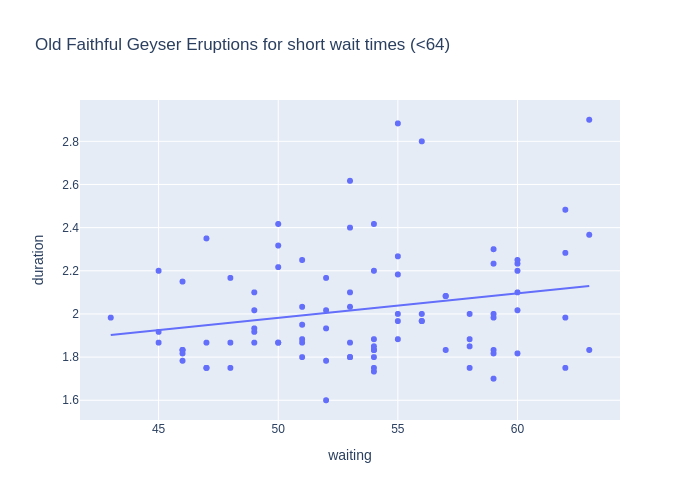

In [60]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

While restricting the waiting time to be < 64, the p-value of the parameter waiting is 0.036. Since this is a smaller p-value than our $\alpha$-significance level of 0.05, we have moderate evidence against the null hypothesis. Thus we conclude that restricting the waiting time to be < 64 shows the waiting time has a linear relationship with the duration of eruption in the Old Faithful Geyser dataset.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


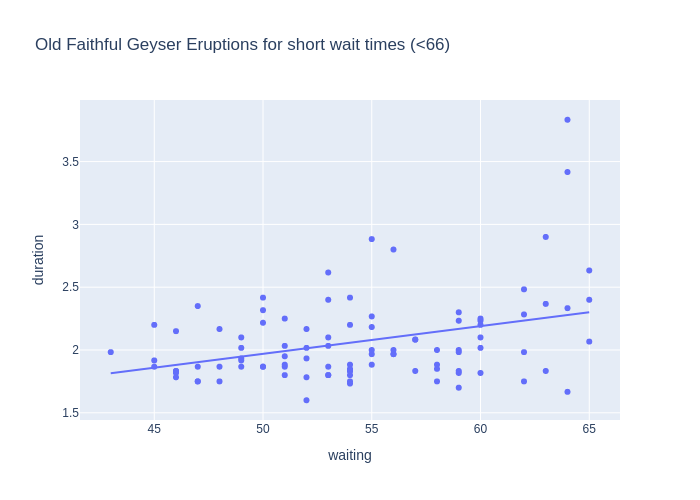

In [61]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

While restricting the waiting time to be < 66, the p-value of the parameter waiting is 0.238. This is a significantly smaller p-value than our $\alpha$-significance level of 0.05, so we have very strong evidence against the null hypothesis. Thus we conclude that restricting the waiting time to be < 66 still shows a linear relationship between the waiting time and the duration of eruption in the Old Faithful Geyser dataset.

Question 10.

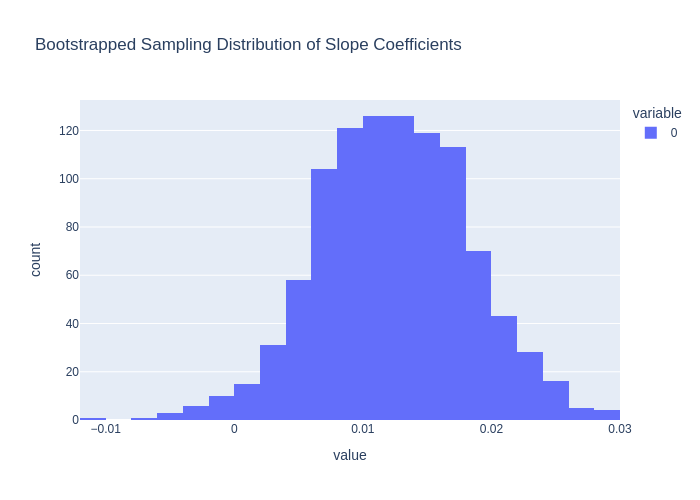

95% Bootstrapped Confidence Interval: (0.0006905705158552796, 0.02396687041062307)


In [81]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf

np.random.seed(42)

# Assuming old_faithful is already loaded as a DataFrame
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Bootstrapping: Generate multiple bootstrap samples, fit the model, and collect slopes
bootstrapped_slope_coefficients = []

# Number of bootstrap iterations
n_bootstrap = 1000
for _ in range(n_bootstrap):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    bootstrapped_slope_coefficients.append(fitted_model.params.iloc[1])  # Collect the slope (beta1) using iloc

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the distribution of bootstrapped slope coefficients
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title='Bootstrapped Sampling Distribution of Slope Coefficients')
fig.show(renderer = 'png')

# Calculate the 95% confidence interval from the bootstrapped distribution
ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval: ({ci_lower}, {ci_upper})")


In [82]:
import numpy as np
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf

np.random.seed(42)

# Step 2: Simulate data under null hypothesis and get p-value
simulated_slope_coefficients = []
n_simulations = 1000

# Simulate and collect slope coefficients under the null hypothesis
for _ in range(n_simulations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + \
                                          stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation)
    fitted_model = model.fit()
    simulated_slope_coefficients.append(fitted_model.params.iloc[1])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Calculate the p-value based on the simulated distribution under the null hypothesis
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value: {p_value}")

Simulated p-value: 0.029


In [83]:
import numpy as np
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf

# Check if 0 is within the confidence interval
contains_zero = ci_lower <= 0 <= ci_upper
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Step 3: Compare with the p-value from statsmodels summary
# Retrieve the p-value from statsmodels
model = smf.ols('duration ~ waiting', data=old_faithful[long_wait])
fitted_model = model.fit()
statsmodels_p_value = fitted_model.summary2().tables[1]['P>|t|'][1]
print(f"Statsmodels p-value: {statsmodels_p_value}")

# Check if the simulated p-value approximately matches the statsmodels p-value
matches = np.isclose(p_value, statsmodels_p_value, atol=0.01)
print(f"Does the simulated p-value match the statsmodels p-value? {'Yes' if matches else 'No'}")


Does the 95% CI contain 0? No
Statsmodels p-value: 0.038135755338567744
Does the simulated p-value match the statsmodels p-value? Yes


/tmp/ipykernel_53/3156817890.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### Question 11.

In [87]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Assuming old_faithful is already loaded as a DataFrame
# Defining "short" and "long" categories based on waiting time
short_wait_limit = 68
old_faithful['k'] = np.where(old_faithful['waiting'] < short_wait_limit, 'short', 'long')

# Fit the model with the indicator variable for 'short' vs 'long' waiting time
model = smf.ols('duration ~ C(k)', data=old_faithful)
fitted_model = model.fit()

# Display the model summary
print(fitted_model.summary())

# The p-value for the difference between 'short' and 'long' groups
# The term 'C(k)[T.short]' is the contrast (difference) between the two groups
contrast_p_value = fitted_model.pvalues['C(k)[T.short]']
print(f"P-value for difference between 'short' and 'long' groups: {contrast_p_value}")


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        04:21:35   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2979      0.031    136.594

Big picture differences:

Each of the previous models used the waiting time, a continuous variable as the predictor. The models were simple linear regression models attempting to capture the relationship between waiting time and duration directly.

In the new model with a indicator variable, it is simplified by only considering if the wait time is "short" or "long". This model is a two-group comparison, where we evaluate the difference in average eruption durations between the short and long group instead of a continous linear relation. Our parameter of interest is $\beta_{\text{contrast}}$, which tells us the expected difference in eruption duration between long and short waits.

Evidence Against the Null Hypothesis:
As our new null hypothesis is "no difference between groups on average", and we received a significantly small p-value, there is very strong evidence against the null hypothesis. This represents that there is a difference on average in eruption duration between the two groups, short and long waiting time.

Question 12.

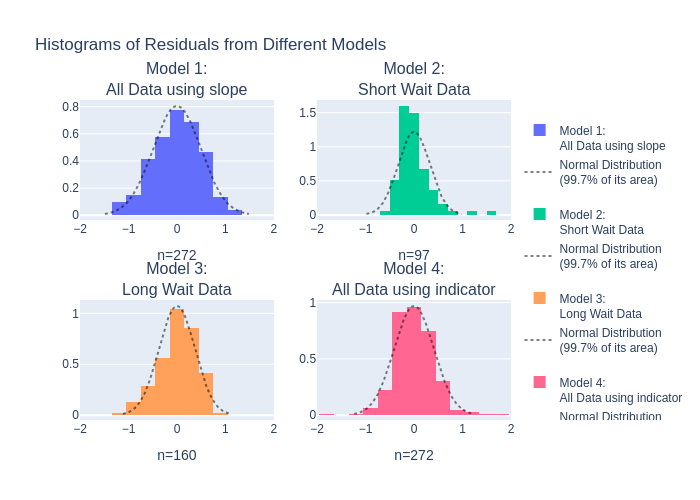

In [89]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The first model suggests plausibility for the normal distrubution of the error terms, as it shows a normally distrubuted residual centered in the middle, 0. Every other models contains some skewness in the distrbution, therefore they make our assumption of normally distrbuted error terms less plasusible.

Question 13.

In [90]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Permutation Test
observed_difference = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
n_permutations = 1000
permuted_differences = []

for _ in range(n_permutations):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1, replace=False).values)
    mean_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_differences.append(mean_diff)

permuted_differences = np.array(permuted_differences)
p_value = (np.abs(permuted_differences) >= np.abs(observed_difference)).mean()
print(f"Permutation test p-value: {p_value}")

# Bootstrap Confidence Interval
n_bootstrap = 1000
bootstrapped_mean_differences = []

for _ in range(n_bootstrap):
    boot_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    mean_diff = boot_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_differences.append(mean_diff)

ci_lower, ci_upper = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for Mean Difference: ({ci_lower}, {ci_upper})")


Permutation test p-value: 0.0
95% Bootstrap Confidence Interval for Mean Difference: (2.1065319302325585, 2.293113738372093)


Explanation of the Sampling Approaches

Permutation Test: In the permutation test, we are simulating the distribution of mean differences under the null hypothesis by randomly reassigning labels to the data. This approach assumes that the observed difference is due to random assignment rather than a true effect.

Bootstrap Confidence Interval: In bootstrapping, we simulate possible sample means by resampling with replacement within each group. This resampling simulates the variability in each group if we repeatedly took samples from the populations.

Comparison to the Indicator Variable Model Approach

Similarity:

Both approaches test for the effect of the "kind" or wait time category on eruption duration.
All methods aim to determine whether the duration differs between groups.

Differences:

Indicator Variable Model: Uses regression with an indicator variable (0 for "short" and 1 for "long") to measure the difference in means directly. It tests for significance through a t-test on the regression coefficient for the indicator.

Permutation Test: A non-parametric approach that makes no assumptions about the distribution of the data. It assesses the null hypothesis by creating a sampling distribution through label shuffling.

Bootstrap Confidence Interval: Provides a non-parametric confidence interval for the difference in means without assuming normality. This approach resamples within groups to estimate variability.

## Chatgpt Session 1

Link: https://chatgpt.com/share/672d97f2-0f78-800f-81b3-cda1cf57c165

Summary: Certainly! Here’s a summary of our exchanges regarding statistical methods, hypothesis testing, and model comparisons using the Old Faithful dataset.

---

### Summary of Interactions:

1. **Linear Regression with Wait Time Data**:  
   We initially worked on creating linear regression models with the Old Faithful geyser dataset, focusing on `duration` as the dependent variable and `waiting` as the independent variable. Specifically:
   - We analyzed separate models for "short" wait times (under 64 minutes) and "long" wait times (over 71 minutes) and then adjusted this to a new cutoff at 68 minutes.
   - We explored a model with an indicator variable based on the new wait time cutoff, treating `kind` (short vs. long) as a categorical variable in the regression.

2. **Model Comparison and Diagnostics**:
   - We visualized histograms of residuals for each model to evaluate the plausibility of normal error terms.
   - Discussed the impact of skewness in residuals, noting that non-normal distributions of residuals challenge the assumption of normally distributed error terms in linear regression.

3. **Permutation and Bootstrap Methods**:
   - We designed a permutation test to evaluate whether there's a statistically significant difference in `duration` between "short" and "long" groups, using shuffled `kind` labels to simulate the null hypothesis distribution.
   - We implemented bootstrapping within each group to create a 95% confidence interval for the difference in mean `duration` between "short" and "long" groups.
   - Both methods were discussed as non-parametric alternatives to the parametric indicator variable model.

4. **Comparison of Methods**:
   - The indicator variable regression model allowed for a direct estimation of the effect of "kind" on `duration` with hypothesis testing on the regression coefficient.
   - The permutation test provided a non-parametric way to assess the null hypothesis without relying on assumptions about the data distribution.
   - The bootstrap confidence interval quantified the mean difference variability between the groups independently of normality assumptions.

5. **Code Implementation**:
   - You implemented Python code using `pandas`, `numpy`, and `statsmodels` for each analysis, including:
     - Shuffling labels for the permutation test,
     - Bootstrapping the sample means to calculate a confidence interval, and
     - Generating plots to visually assess residuals across models.

This summary captures our approach to understanding group differences in eruption durations, evaluating model assumptions, and applying resampling methods to validate findings. The discussion also underscored the practical distinctions between parametric and non-parametric tests in statistical analysis. 

---

This outline should give a clear and concise summary of our work together on the assignment. Let me know if you need any more detail in any section!

Question 14. 

Let's skip this last one :)